In [ ]:
# main.ipynb - Mobile Banking App Review Analysis
# Orchestrates scraping, analysis, and preprocessing of Ethiopian bank app reviews

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from datetime import datetime
import importlib

import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# notebooks/main.ipynb

# Import sys and set path to reach src directory
import sys
import os
sys.path.append(os.path.abspath("../src"))

import scraper 
from src import preprocessor
 # This is src/scraper.py

# Set visualization style
plt.style.use('ggplot')
sns.set_palette("Set2")

## 🏦 Ethiopian Mobile Banking App Review Analysis
This notebook manages the entire workflow for analyzing mobile banking app reviews from the Google Play Store:

- Scraping reviews using `scraper.py`
- Conducting exploratory data analysis on raw data
- Preprocessing data with `preprocessor.py`
- Analyzing the cleaned dataset

## 📱 Step 1: Scrape App Reviews

In [55]:

from datetime import datetime

# App IDs for Ethiopian banks
app_ids = {
    "com.combanketh.mobilebanking": "Commercial Bank of Ethiopia",
    "com.boa.boaMobileBanking": "Bank of Abyssinia",
    "com.dashen.dashensuperapp": "Dashen Bank"
}

print("🔍 Starting review scraping process...\n")

for app_id, bank_name in app_ids.items():
    print(f"➡️ Scraping reviews for {bank_name}...")
    df = scraper.scrape_app_reviews(app_id)

    if not df.empty:
        print(f"✅ Retrieved {len(df)} reviews for {bank_name}")
        # Save DataFrame to CSV
        safe_bank_name = bank_name.lower().replace(" ", "_")
        today = datetime.today().strftime("%Y%m%d")
        filename = f"../data/raw/{safe_bank_name}_reviews_{today}.csv"
        df.to_csv(filename, index=False)
        print(f"💾 Saved reviews to {filename}")
    else:
        print(f"❌ Failed to retrieve reviews for {bank_name}")

print("\n🎉 Scraping complete!")


🔍 Starting review scraping process...

➡️ Scraping reviews for Commercial Bank of Ethiopia...
Scraping reviews for Commercial Bank of Ethiopia...
Successfully scraped 500 reviews for Commercial Bank of Ethiopia
✅ Retrieved 500 reviews for Commercial Bank of Ethiopia
💾 Saved reviews to ../data/raw/commercial_bank_of_ethiopia_reviews_20250608.csv
➡️ Scraping reviews for Bank of Abyssinia...
Scraping reviews for BoA Mobile...
Successfully scraped 500 reviews for BoA Mobile
✅ Retrieved 500 reviews for Bank of Abyssinia
💾 Saved reviews to ../data/raw/bank_of_abyssinia_reviews_20250608.csv
➡️ Scraping reviews for Dashen Bank...
Scraping reviews for Dashen Bank...
Successfully scraped 449 reviews for Dashen Bank
✅ Retrieved 449 reviews for Dashen Bank
💾 Saved reviews to ../data/raw/dashen_bank_reviews_20250608.csv

🎉 Scraping complete!


## 📊 Step 2: Exploratory Data Analysis on Raw Data

In [38]:
# Load all raw CSV files
raw_files = glob.glob("../data/raw/*.csv")
raw_dfs = []

for file in raw_files:
    bank_name = os.path.basename(file).split('_')[0].replace('_', ' ').title()
    df = pd.read_csv(file)
    df['file_source'] = file
    raw_dfs.append(df)

if raw_dfs:
    raw_data = pd.concat(raw_dfs, ignore_index=True)
    print(f"📊 Loaded {len(raw_data)} total reviews from {len(raw_dfs)} bank apps")
else:
    print("❌ No raw data found. Please run the scraper first.")
    raw_data = pd.DataFrame()

📊 Loaded 1449 total reviews from 3 bank apps


### 📋 Basic Structural Analysis

In [39]:
if not raw_data.empty:
    print("\n📋 Raw Data Overview:")
    display(raw_data.head())
    
    print("\n🔢 Data Shape:", raw_data.shape)
    print("\n📊 Data Types:")
    display(raw_data.dtypes)
    
    print("\n📊 Basic Statistics:")
    display(raw_data.describe(include='all'))


📋 Raw Data Overview:


,review_text,rating,date,bank,source,file_source
0,"I have a fitayah account, a type of interest free account, and because their system is unable to...",1,2024-02-18 09:28:12,BoA Mobile,Google Play,../data/raw\bank_of_abyssinia_reviews_20250608_202807.csv
1,Can you please just make it functional. I don't think anyone cares how good it looks if not a si...,1,2024-04-15 12:30:58,BoA Mobile,Google Play,../data/raw\bank_of_abyssinia_reviews_20250608_202807.csv
2,"Developers/ the company takes too long to update the app, and throughout that process, the app i...",2,2024-05-03 10:28:07,BoA Mobile,Google Play,../data/raw\bank_of_abyssinia_reviews_20250608_202807.csv
3,"This app is a joke. It crashes more than it works, takes forever to load, and half the features ...",1,2025-05-21 13:49:15,BoA Mobile,Google Play,../data/raw\bank_of_abyssinia_reviews_20250608_202807.csv
4,"Hello, I’m facing a problem with the BOA Mobile app. Every time I enter my phone number and pass...",1,2025-06-03 16:21:34,BoA Mobile,Google Play,../data/raw\bank_of_abyssinia_reviews_20250608_202807.csv



🔢 Data Shape: (1449, 6)

📊 Data Types:


review_text    object
rating          int64
date           object
bank           object
source         object
file_source    object
dtype: object


📊 Basic Statistics:


,review_text,rating,date,bank,source,file_source
count,1449,1449.000000,1449,1449,1449,1449
unique,1405,NaN,1449,3,1,3
top,good,NaN,2024-02-18 09:28:12,BoA Mobile,Google Play,../data/raw\bank_of_abyssinia_reviews_20250608_202807.csv
freq,11,NaN,1,500,1449,500
mean,NaN,3.108351,NaN,NaN,NaN,NaN
std,NaN,1.766397,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN
50%,NaN,3.000000,NaN,NaN,NaN,NaN
75%,NaN,5.000000,NaN,NaN,NaN,NaN


### 🔍 Missing and Null Values


🔍 Missing Values Analysis:


,Missing Values,Percentage
review_text,0,0.0
rating,0,0.0
date,0,0.0
bank,0,0.0
source,0,0.0
file_source,0,0.0
review_length,0,0.0


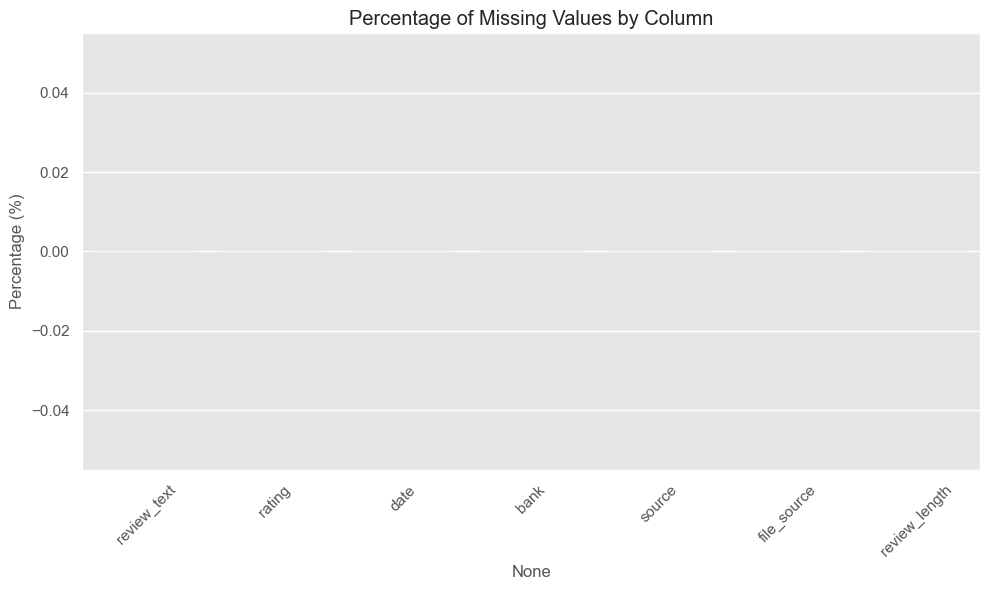

In [47]:
if not raw_data.empty:
    # Calculate missing values
    missing_data = raw_data.isnull().sum()
    missing_percentage = (missing_data / len(raw_data)) * 100
    
    missing_df = pd.DataFrame({
        'Missing Values': missing_data,
        'Percentage': missing_percentage
    })
    
    print("\n🔍 Missing Values Analysis:")
    display(missing_df)
    
    # Visualize missing data
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_df.index, y='Percentage', data=missing_df)
    plt.title('Percentage of Missing Values by Column')
    plt.xticks(rotation=45)
    plt.ylabel('Percentage (%)')
    plt.tight_layout()
    plt.show()

### 🔄 Duplicates Check

In [41]:
if not raw_data.empty:
    # Check for duplicates
    duplicates = raw_data.duplicated().sum()
    print(f"\n🔄 Duplicate Rows: {duplicates} ({duplicates/len(raw_data)*100:.2f}%)")
    
    # Check for duplicates based on review text only
    text_duplicates = raw_data.duplicated(subset=['review_text']).sum()
    print(f"🔄 Duplicate Reviews (by text only): {text_duplicates} ({text_duplicates/len(raw_data)*100:.2f}%)")


🔄 Duplicate Rows: 0 (0.00%)
🔄 Duplicate Reviews (by text only): 44 (3.04%)


### 📏 Length of Reviews

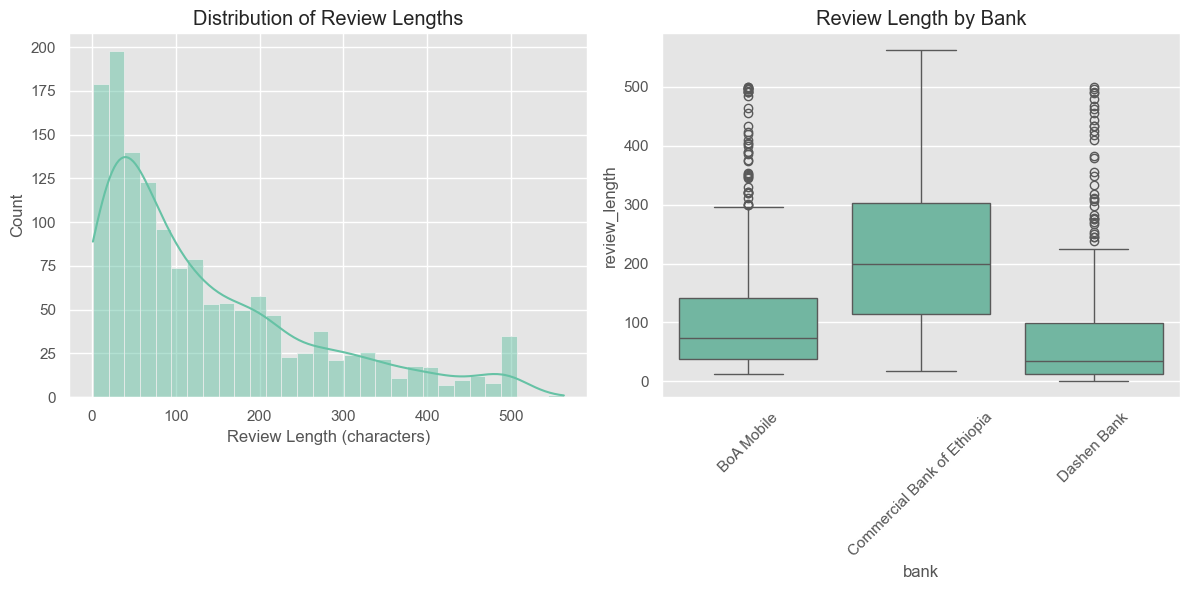


📏 Review Length Statistics:


,count,mean,std,min,25%,50%,75%,max
bank,,,,,,,,
BoA Mobile,500.0,111.652000,109.068064,12.0,38.0,73.0,142.25,500.0
Commercial Bank of Ethiopia,500.0,217.986000,126.241466,17.0,114.0,198.5,303.25,563.0
Dashen Bank,449.0,75.775056,99.749265,1.0,13.0,35.0,99.00,500.0


In [42]:
if not raw_data.empty:
    # Calculate review length
    raw_data['review_length'] = raw_data['review_text'].fillna("").apply(len)
    
    # Plot distribution of review lengths
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(raw_data['review_length'], bins=30, kde=True)
    plt.title('Distribution of Review Lengths')
    plt.xlabel('Review Length (characters)')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x='bank', y='review_length', data=raw_data)
    plt.title('Review Length by Bank')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    print("\n📏 Review Length Statistics:")
    display(raw_data.groupby('bank')['review_length'].describe())

### ⭐ Ratings Distribution

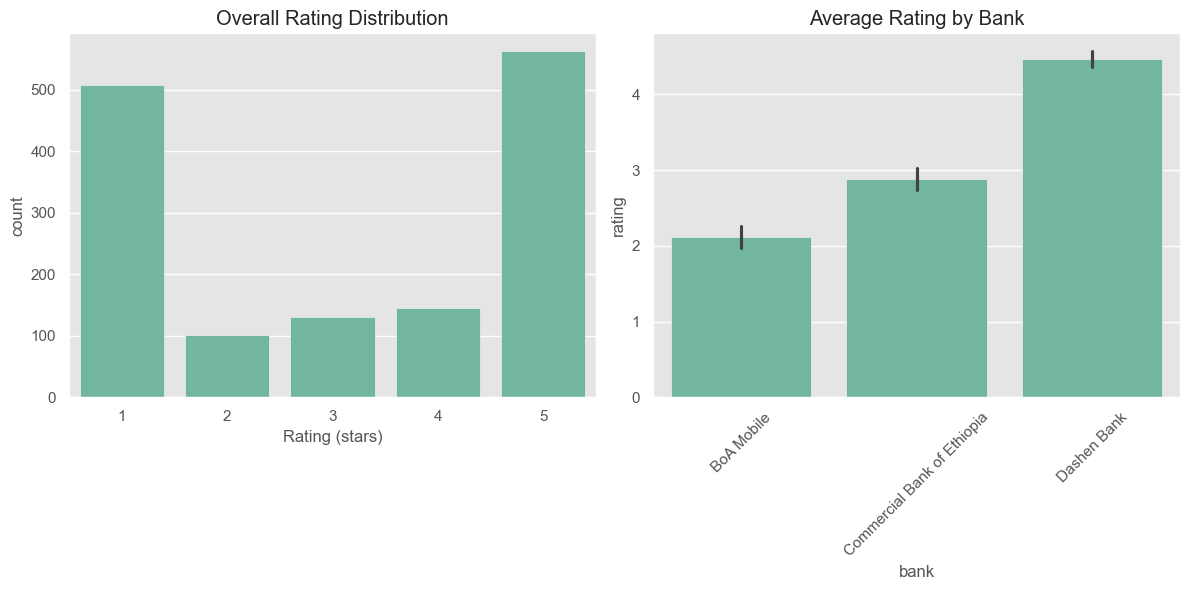


⭐ Rating Statistics by Bank:


,Total Reviews,Average Rating,std,min,max
bank,,,,,
BoA Mobile,500,2.112000,1.606430,1,5
Commercial Bank of Ethiopia,500,2.882000,1.566200,1,5
Dashen Bank,449,4.469933,1.206238,1,5


In [48]:
if not raw_data.empty:
    # Plot ratings distribution
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.countplot(x='rating', data=raw_data)
    plt.title('Overall Rating Distribution')
    plt.xlabel('Rating (stars)')
    
    plt.subplot(1, 2, 2)
    sns.barplot(x='bank', y='rating', data=raw_data, estimator=np.mean)
    plt.title('Average Rating by Bank')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Detailed rating statistics by bank
    rating_stats = raw_data.groupby('bank')['rating'].agg(['count', 'mean', 'std', 'min', 'max'])
    rating_stats = rating_stats.rename(columns={'count': 'Total Reviews', 'mean': 'Average Rating'})
    
    print("\n⭐ Rating Statistics by Bank:")
    display(rating_stats)

### 🏦 Reviews per Bank

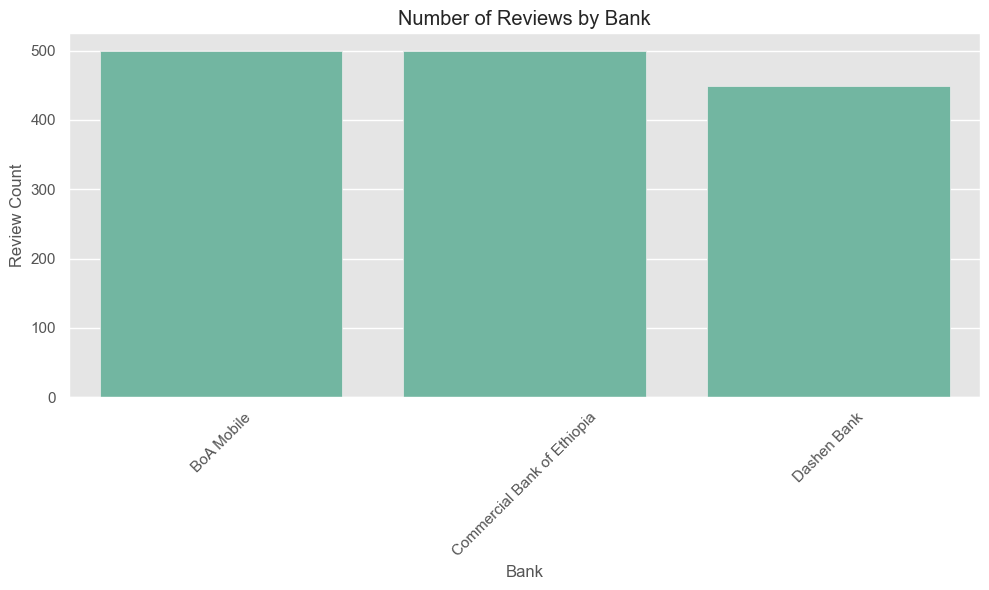


🏦 Reviews per Bank:


,Bank,Review Count
0,BoA Mobile,500
1,Commercial Bank of Ethiopia,500
2,Dashen Bank,449


In [44]:
if not raw_data.empty:
    # Count reviews per bank
    bank_counts = raw_data['bank'].value_counts().reset_index()
    bank_counts.columns = ['Bank', 'Review Count']
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Bank', y='Review Count', data=bank_counts)
    plt.title('Number of Reviews by Bank')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    print("\n🏦 Reviews per Bank:")
    display(bank_counts)

### 🚫 Empty Reviews

In [51]:
if not raw_data.empty:
    # Check for empty reviews
    empty_reviews = raw_data['review_text'].fillna("").apply(lambda x: len(str(x).strip()) == 0).sum()
    print(f"\n🚫 Empty Reviews: {empty_reviews} ({empty_reviews/len(raw_data)*100:.2f}%)")
    
    # Reviews with just ratings but no text
    rating_only = raw_data[raw_data['review_text'].fillna("").apply(lambda x: len(str(x).strip()) == 0)]
    
    # Rating distribution for empty reviews
    if not rating_only.empty:
        plt.figure(figsize=(8, 5))
        sns.countplot(x='rating', data=rating_only)
        plt.title('Rating Distribution for Reviews with No Text')
        plt.xlabel('Rating (stars)')
        plt.tight_layout()
        plt.show()


🚫 Empty Reviews: 0 (0.00%)


## 🧹 Step 3: Preprocess the Data

In [109]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import src.preprocessor
import importlib
importlib.reload(src.preprocessor)

print("\n🧹 Starting data preprocessing...")
processed_data = src.preprocessor.preprocess_bank_reviews()
print("✅ Preprocessing complete!")


🧹 Starting data preprocessing...
hello
No raaaaaw data files found. Please run the scraper first.
✅ Preprocessing complete!


## 📈 Step 4: Analysis of Preprocessed Data

In [ ]:
# Load the processed data
try:
    proc_data = pd.read_csv("../data/processed/all_bank_reviews_processed.csv")
    print(f"\n📊 Loaded {len(proc_data)} processed reviews")
    
    # Display sample of processed data
    print("\n📋 Processed Data Sample:")
    display(proc_data.head())
    
    # Compare raw vs processed data counts
    if not raw_data.empty:
        raw_count = len(raw_data)
        proc_count = len(proc_data)
        diff = raw_count - proc_count
        
        print(f"\n📊 Data Reduction Summary:")
        print(f"Original reviews: {raw_count}")
        print(f"Processed reviews: {proc_count}")
        print(f"Reduction: {diff} reviews ({diff/raw_count*100:.2f}%)")
        
        # Create comparison dataframe
        compare_df = pd.DataFrame({
            'Dataset': ['Raw Data', 'Processed Data'],
            'Count': [raw_count, proc_count]
        })
        
        plt.figure(figsize=(8, 5))
        sns.barplot(x='Dataset', y='Count', data=compare_df)
        plt.title('Comparison of Raw vs Processed Data Volume')
        plt.tight_layout()
        plt.show()
    
    # Examine issues resolved by preprocessing
    print("\n🔍 Impact of Preprocessing:")
    
    # 1. Missing values resolved
    missing_proc = proc_data.isnull().sum()
    missing_proc_pct = (missing_proc / len(proc_data)) * 100
    
    print("\nMissing Values After Preprocessing:")
    display(pd.DataFrame({
        'Missing Values': missing_proc,
        'Percentage': missing_proc_pct
    }))
    
    # 2. Duplicates resolved
    duplicates_proc = proc_data.duplicated().sum()
    print(f"\nDuplicates After Preprocessing: {duplicates_proc} ({duplicates_proc/len(proc_data)*100:.2f}%)")
    
    # 3. Date normalization
    print("\nDate Format After Preprocessing:")
    display(proc_data['date'].head())
    
except Exception as e:
    print(f"❌ Error loading processed data: {str(e)}")

❌ Error loading processed data: [Errno 2] No such file or directory: 'data/processed/all_bank_reviews_processed.csv'


## 🏁 Conclusion

In [ ]:
print("\n🏁 Analysis Complete!")
print("""
Key Findings:
- Successfully scraped and processed reviews for Ethiopian mobile banking apps
- Analyzed distribution of ratings and review content across banks
- Identified and addressed data quality issues through preprocessing
- Prepared clean dataset ready for further analysis or sentiment analysis
""")